In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, regularizers

In [2]:
df = pd.read_csv(r"D:\datasets\DL\mnist_784_csv.csv")


In [3]:
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [4]:
x_data = df.iloc[:,:-1].values
labels = df.iloc[:,-1].values

In [5]:
x_data = x_data / 255.0

In [6]:
x_train , x_test = train_test_split(x_data , test_size = 0.2 , random_state = 42)

In [7]:
x_train.shape

(56000, 784)

In [8]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [9]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [10]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [11]:
input_img = layers.Input(shape=(28, 28, 1))

In [12]:
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)

In [13]:
# Decoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [14]:
# Compile the model
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [15]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.3136 - val_loss: 0.1264
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1234 - val_loss: 0.1158
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1150 - val_loss: 0.1120
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1110 - val_loss: 0.1087
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1085 - val_loss: 0.1069
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1066 - val_loss: 0.1055
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1056 - val_loss: 0.1043
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1042 - val_loss: 0.1038
Epoch 9/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1034 - val_loss: 0.1036
Epoch 10/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1023 - val_loss: 0.1018


In [16]:
denoised_imgs = autoencoder.predict(x_test_noisy) 

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


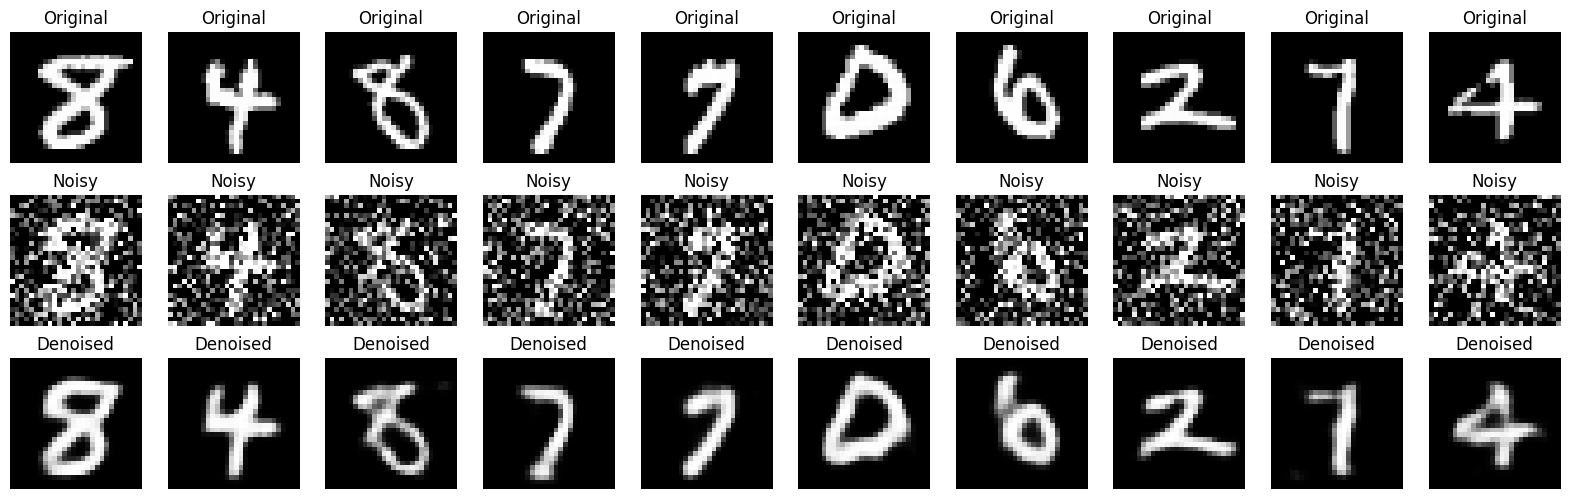

In [17]:
n = 10  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Denoised images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(denoised_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

plt.show()